# 📲 **Imports.**

This cell contains a list of Python libraries and modules that are being imported for use in the notebook. These imports include both standard Python libraries (such as 📁 **io**, 📁 **os**, 📁 **csv**, ➗ **math**, and 🌊 **logging**) and popular third-party libraries (such as 📷 **cv2**, 🧮 **numpy**, 🐼 **pandas**, 🌊 **seaborn**, 🔥 **torch**, 🤖 **sklearn**, 🤖 **models**, 🤖 **transforms**, 🧑‍🔬 **optim**, and 🧠 **nn**).

Some of the libraries are used for data manipulation and visualization (such as 🧮 **numpy**, 🐼 **pandas**, and 🌊 **seaborn**), while others are used for machine learning and deep learning tasks (such as 🔥 **torch**, 🤖 **sklearn**, 🤖 **models**, 🤖 **transforms**, 🧑‍🔬 **optim**, and 🧠 **nn**). The 📷 **cv2** library is specifically used for computer vision tasks, while the 🌊 **logging** library is used for logging messages during the execution of the code.

#### **Detailed Explanation for some libraries:**

- io: provides input/output functionality
- os: provides operating system functionality
- cv2: used for computer vision and image processing
- csv: used to work with CSV files
- time: provides time-related functionality
- copy: provides copy functionality
- math: provides mathematical functions
- torch: PyTorch, a machine learning library
- shutil: provides file and directory manipulation functionality
- librosa: used for audio analysis
- logging: used for logging
- argparse: used for command-line argument parsing
- numpy: used for numerical computing
- pandas: used for data manipulation and analysis
- seaborn: used for statistical data visualization
- sklearn: scikit-learn, a machine learning library
- matplotlib: used for data visualization
- tqdm: used for progress bars
- XGBRegressor: a machine learning algorithm from XGBoost, a gradient boosting library
- statistics: provides statistical functions
- datasets: used for loading datasets
- transforms: used for data transformations
- DataLoader: used for loading data in batches
- models: provides pre-trained deep learning models
- make_grid: used for making a grid of images
- GridSearchCV: used for hyperparameter tuning in machine learning models
- KFold: used for cross-validation in machine learning models.

In [45]:
import io
import os
import cv2
import csv
import time
import copy
import math
import torch
import shutil
import librosa
import logging
import argparse
import numpy as np
import torchvision
import numpy as np
import pandas as pd 
import seaborn as sb
import torch.nn as nn
from PIL import Image
from tqdm import tqdm
import torch.optim as optim
from sklearn import datasets
import IPython.display as ipd
import matplotlib.pyplot as plt
from tqdm.notebook import trange
from xgboost import XGBRegressor
from statistics import mean, stdev
from torchvision.utils import make_grid
import torch.utils.model_zoo as model_zoo
from torch.utils.data import Dataset, DataLoader
from sklearn.ensemble import RandomForestRegressor
from torchvision import datasets, models, transforms
from sklearn.model_selection import GridSearchCV, learning_curve, validation_curve
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit, KFold

# Some information about audio data before we start with audio data processing

### What are x and y axis in a audio wave representation?
![Sound wave image](https://swphonetics.files.wordpress.com/2012/03/wavsin01.jpg)
- The y-axis represents sound pressure, the x-axis represents time.

### Standard waveforms
#### Sine waveform
![Sine wave image](https://www.electronics-tutorials.ws/wp-content/uploads/2018/05/waveforms-tim1.gif)

#### Square waveform
![Square waveform image](https://www.electronics-tutorials.ws/wp-content/uploads/2018/05/waveforms-tim3.gif)

#### Rectangular waveform
![Rectangular waveform image](https://www.electronics-tutorials.ws/wp-content/uploads/2018/05/waveforms-tim6.gif)

#### Triangular waveform
![Triangular waveform image](https://www.electronics-tutorials.ws/wp-content/uploads/2018/05/waveforms-tim8.gif)

#### Sawtooth waveform
![Sawtooth waveform image](https://www.electronics-tutorials.ws/wp-content/uploads/2018/05/waveforms-tim9.gif)

# 👨‍💻 Setting up file paths in Python

This Python code sets up file paths for an audio dataset. The dataset contains recordings of speech, and the goal is to predict the age of the speaker based on their voice.

**📂 File paths** 

A file path is like a directory or folder path on your computer. It tells the computer where to find a specific file or folder. In this code, there are three file paths:

1. `audio_files_dir`: This path points to a directory containing audio files. The directory is located in the `/kaggle/input` folder, which is a folder used by the Kaggle platform to store input data.
2. `train_dir`: This path points to a file called `train.csv`, which contains information about the training set for the machine learning model. 
3. `test_dir`: This path points to a file called `test.csv`, which contains information about the test set for the machine learning model.

These file paths are used later in the code to load the data for the machine learning model.

In [22]:
audio_files_dir = '/kaggle/input/ieeenu-cis-senior-members-nuaih-age-capturing-2/Age_Through_Speech/Age_Through_Speech/one_and_multiple'
train_dir = '/kaggle/input/ieeenu-cis-senior-members-nuaih-age-capturing-2/Age_Through_Speech/Age_Through_Speech/train.csv'
test_dir = '/kaggle/input/ieeenu-cis-senior-members-nuaih-age-capturing-2/Age_Through_Speech/Age_Through_Speech/test.csv'

# 🎧🎤🔊 Understanding Audio Data with Librosa

Librosa is a Python library used for analyzing and processing audio signals. In this code, librosa is used to load an audio file located in the specified path. The `load` function returns two values: `x` which is a one-dimensional numpy array of the audio samples, and `sr` which is an integer representing the sampling rate of the audio file in samples per second. The `print` statements display the type of `x` and `sr`, as well as the shape of `x` and the value of `sr`.

In [23]:
x, sr = librosa.load("/kaggle/input/ieeenu-cis-senior-members-nuaih-age-capturing-2/Age_Through_Speech/Age_Through_Speech/one_and_multiple/S_01_4005_VE5.wav", sr=44100)

print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(55992,) 44100


# 🎶🔊 Visualizing and Playing Audio Data 🎵

This code segment shows how to visualize and play audio data using two different libraries.

- 🎨 `librosa.display.waveshow(x)` plots the audio waveform of the audio signal `x` using matplotlib.
- 🔊 `ipd.Audio(data=x, rate=sr)` plays the audio signal `x` using the IPython.display library. The parameter `rate` specifies the sample rate of the audio signal.

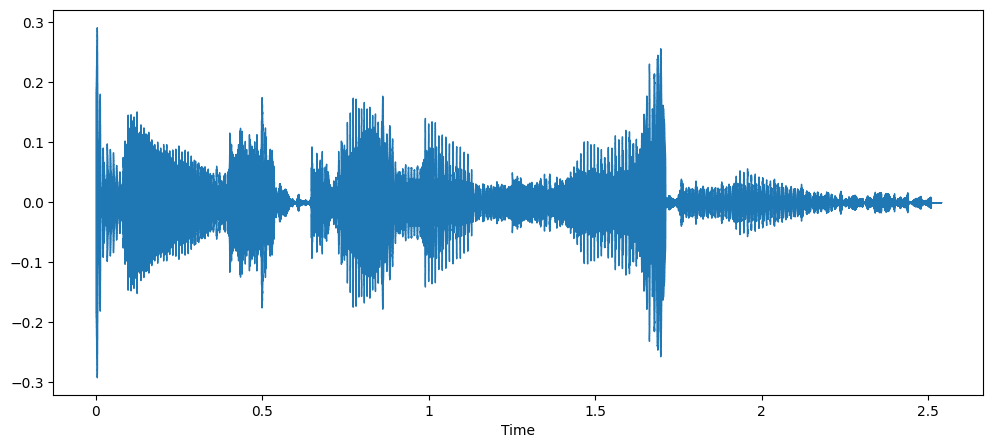

In [24]:
plt.figure(figsize=(12,5))
librosa.display.waveshow(x)
ipd.Audio(data=x, rate=sr)

# **🎼📈Visualizing the Frequency Content of an Audio Signal using Spectrogram**

This code loads an audio file in the WAV format, and uses the `librosa` library to convert the raw audio signal into a "spectrogram". A spectrogram is a visualization of how the frequency content of an audio signal changes over time. 

The code first applies a Short-Time Fourier Transform (STFT) to the audio signal to get a 2D array of complex numbers that represent the signal's frequency content at different times. The `amplitude_to_db` function is then applied to the absolute value of the STFT to convert the array to a decibel (dB) scale. This results in a 2D array where each pixel represents the magnitude of the signal's frequency content at a given time and frequency, in dB.

Finally, the `specshow` function from the `librosa.display` module is used to display the spectrogram as an image. The x-axis represents time, the y-axis represents frequency, and the color of each pixel represents the magnitude of the frequency content at that time and frequency, in dB. The `colorbar` function is used to add a scale indicating the magnitude in dB.

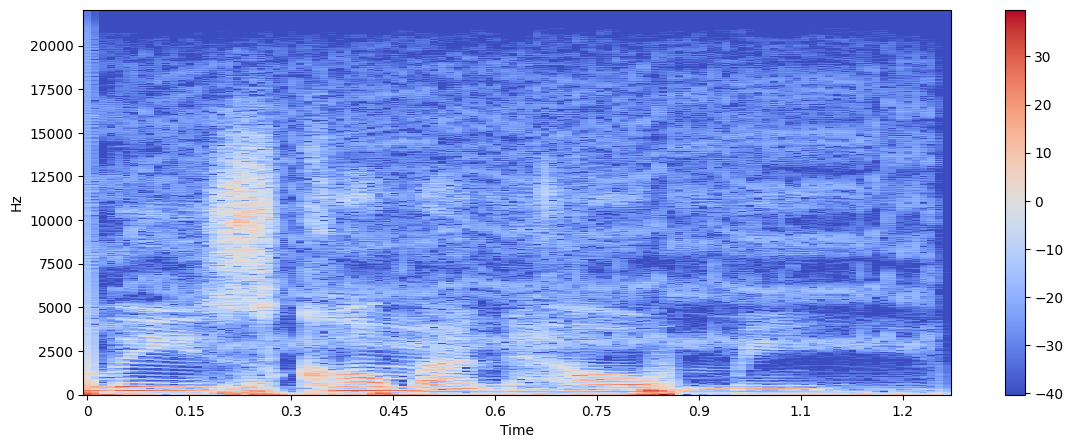

In [25]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

# **🎨🔍 Visualizing the Audio Signal in Log Scale 🎵**

This code snippet uses the `librosa` library to display the power spectral density of an audio signal `x`. The signal is transformed into a Short-Time Fourier Transform (STFT) representation using `librosa.stft(x)`. The magnitude of the STFT is then converted to decibels using `librosa.amplitude_to_db()`. 

The resulting power spectral density is displayed in a 2D heatmap using `librosa.display.specshow()`. In this code snippet, the `y_axis` argument is set to 'log', which changes the frequency axis to a logarithmic scale, making it easier to see details in both low and high frequencies. 

The resulting plot provides a visual representation of the power spectral density of the audio signal over time, where the brighter regions indicate higher power density in the corresponding frequency and time interval.

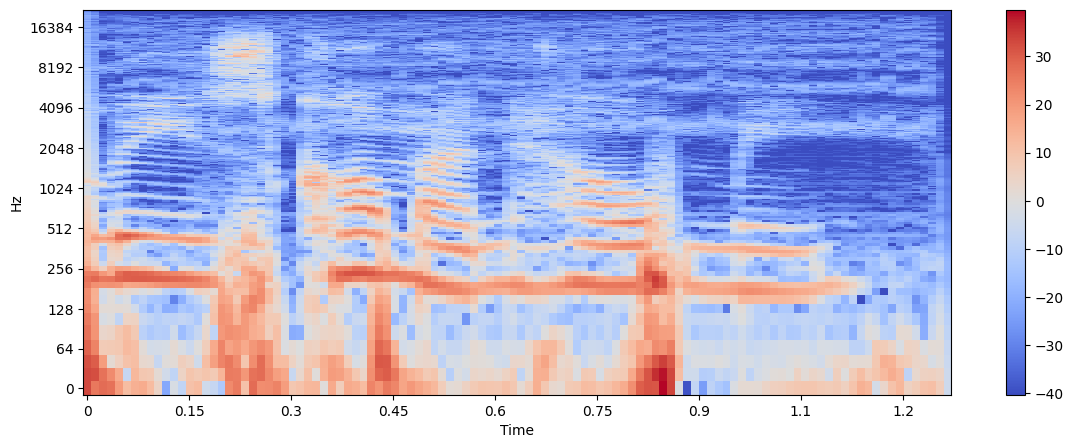

In [26]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

# **👨‍💻 Loading and Splitting Data in Python**

This Python code loads data from two CSV files and splits a dataset into training and testing sets. The dataset contains audio recordings of speech and information about the age of the speakers.

**📊 Loading Data**

The `pd.read_csv()` function is used to load data from the `train.csv` and `test.csv` files. The data is stored in two variables: `train_data` and `test_data`.

**📂 Audio File Names**

Next, a list of audio file names is obtained using the `os.listdir()` function. This function returns a list of all the files in the `audio_files_dir` directory. The list is sorted in alphabetical order using the `sorted()` function.

**🔀 Splitting the Dataset**

The dataset is split into a training set and a testing set. The training set will be used to train a machine learning model, and the testing set will be used to evaluate the model's performance.

The `for` loop goes through each audio file name in the `audio_file_names` list. The file name is split into three parts using the `split()` function. The third part is the subject number, which is used to determine if the file should be in the training set or the testing set.

If the subject number is in the `test_data` dataframe, the file is added to the testing set. If the subject number is not in the `test_data` dataframe, the file is added to the training set.

In [27]:
# Load the train and test data
train_data = pd.read_csv(train_dir)
test_data = pd.read_csv(test_dir)

# Get a list of the audio file names
audio_file_names = sorted(os.listdir(audio_files_dir))

# Split the dataset into training and testing sets
train_files = []
test_files = []

for name in audio_file_names:
    if sum(test_data['Subject'].isin([int(name.split('_')[2])])) == 1:
        test_files.append(name)
    else:
        train_files.append(name)

# **👨‍💻 Extracting Audio Features in Python**

This Python code defines a function to extract features from audio files. The function takes a file path as input and returns a set of features that can be used to train a machine learning model.

**🎵 Audio Files**

An audio file is a digital file that contains a recording of sound. Audio files can be in various formats, such as MP3 or WAV. In this code, the audio files are located in the `audio_files_dir` directory.

**🎧 Features**

Features are specific characteristics of the audio file that can be used to identify patterns and make predictions. In this code, the following features are extracted from the audio files:

1. Chroma STFT: The average of the chroma feature computed from the short-time Fourier transform of the audio file.
2. RMSE: The average root-mean-square (RMS) energy of the audio file.
3. Spectral centroid: The average of the spectral centroid, which is a measure of the "center of gravity" of the frequency distribution of the audio file.
4. Spectral bandwidth: The average of the spectral bandwidth, which is a measure of the width of the frequency distribution of the audio file.
5. Spectral rolloff: The average of the spectral rolloff frequency, which is the frequency below which a specified percentage of the total spectral energy lies.
6. Zero-crossing rate: The average of the rate of sign-changes of the audio file.
7. MFCC: Mel-Frequency Cepstral Coefficients are a representation of the short-term power spectrum of a sound. The MFCC features of the audio file are calculated using the librosa package.
8. MFCC mean: The mean of the MFCC features.

**🔍 Extracting Features**

The `extract_features()` function loads an audio file using the `librosa.load()` function and then extracts the features listed above using various `librosa.feature` functions. The features are combined into a numpy array using `np.hstack()`, and the array is returned.

**🛡️ Exception Handling**

The function includes a try-except block to handle any errors that may occur while extracting the features. If an error occurs, the function prints an error message and returns `None`.

In [28]:
# Define a function to extract features from the audio files
def extract_features(file_path):
    try:
        # Load the audio file
        y, sr = librosa.load(os.path.join(audio_files_dir, file_path))
        
        # Extract the features
        chroma_stft = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
        rmse = np.mean(librosa.feature.rms(y=y))
        spec_cent = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
        spec_bw = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
        rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
        zcr = np.mean(librosa.feature.zero_crossing_rate(y))
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        mfcc_mean = np.mean(mfcc, axis=1)
        features = np.hstack((chroma_stft, rmse, spec_cent, spec_bw, rolloff, zcr, mfcc_mean))
    except Exception as e:
        print(f"Error occurred while parsing {file_path}: {str(e)}")
        features = None
    return features

# **📝 Creating DataFrames for Training and Testing 🧾📊**

🤖 This code creates two DataFrames, one for the training set and another for the testing set, which will be used to train and evaluate a machine learning model.

**📝 Code Explanation:**
- The code creates two empty DataFrames, one for the training set and another for the testing set, with columns named "Filename" and "Target". 
- Then, it loops through the list of file names in the training and testing sets created earlier.
- For each file, the code extracts the target age from the corresponding CSV file that contains age data for each subject. 
- If the age is not available or is missing, the code sets it to -1.
- It then creates a row with the file name and its corresponding target age and adds it to the respective DataFrame.
- Finally, the code concatenates the created DataFrame with the new row added to it.

🧐 Note that the target age is what we want the machine learning model to predict based on the extracted features from the audio files, which will be done in the subsequent steps.

In [29]:
# Construct the training and testing dataframes
train_files_df = pd.DataFrame(columns=['Filename', 'Target'])
test_files_df = pd.DataFrame(columns=['Filename', 'Target'])

for name in train_files:
    age = train_data[train_data['Subject'] == int(name.split('_')[2])]['Age']
    if len(age) == 0 or np.isnan(age.values[0]):
        age = -1
    else:
        age = int(age)
    row = {'Filename': name, 'Target': age}
    #train_files_df = train_files_df.append(row, ignore_index=True)
    train_files_df = pd.concat([train_files_df, pd.DataFrame([row], columns=train_files_df.columns)], ignore_index=True)

for name in test_files:
    age = test_data[test_data['Subject'] == int(name.split('_')[2])]['Age']
    if len(age) == 0 or np.isnan(age.values[0]):
        age = -1
    else:
        age = int(age)
    row = {'Filename': name, 'Target': age}
    #test_files_df = test_files_df.append(row, ignore_index=True)
    test_files_df = pd.concat([test_files_df, pd.DataFrame([row], columns=test_files_df.columns)], ignore_index=True)

# **🎶🎛️ Extracting and Processing Audio Features**

This code extracts audio features from the audio files and creates a training and testing dataset. 

- The `extract_features` function is defined to extract features from audio files using the `librosa` library. The features include chroma_stft, rmse, spectral centroid, spectral bandwidth, spectral rolloff, zero crossing rate, and mfcc mean.
- The function is applied to each audio file in the training and testing sets using the `apply` function and adding the results to new 'Features' columns in the dataframes.
- Rows with missing features are removed from the dataframes using `dropna`.
- The `X_train` and `X_test` arrays are created by stacking the audio features for each audio file together, and `y_train` and `y_test` are created using the 'Target' column from the dataframes. 

In summary, this code processes the audio files and creates a dataset for training and testing a machine learning model to predict the age of a speaker based on their voice features. 🎤🤖

In [30]:
start_time = time.time()

train_files_df['Features'] = train_files_df['Filename'].apply(lambda x: extract_features(x))
test_files_df['Features'] = test_files_df['Filename'].apply(lambda x: extract_features(x))

train_files_df = train_files_df.dropna()
test_files_df = test_files_df.dropna()

X_train = np.array(train_files_df['Features'].tolist())
y_train = np.array(train_files_df['Target'])

X_test = np.array(test_files_df['Features'].tolist())
y_test = np.array(test_files_df['Target'])

end_time = time.time()
time_elapsed = end_time - start_time

print('Calculating the time taken to process the data in {:.0f}h {:.0f}m {:.0f}s'.format(time_elapsed // 3600 ,(time_elapsed % 3600) // 60, time_elapsed % 60))

Calculating the time taken to process the data in 0h 5m 28s


# **📝 Model Train Block**

**🔍 Objective:** The purpose of this code is to tune the hyperparameters of an XGBoost model using grid search and find the best set of hyperparameters that results in the highest accuracy score.

**🔎 Input:** The input data for this code are the training and testing feature matrices `X_train` and `X_test`, and the corresponding target variables `y_train` and `y_test`.

**🛠️ Process:** The code first defines a parameter grid to search over. This grid contains different values for hyperparameters like learning rate, maximum depth, subsampling, etc. Then, it creates an XGBRegressor object that will be used to fit the data. 

Next, it uses GridSearchCV, which is a built-in function in scikit-learn, to search over the parameter grid and find the best set of hyperparameters. GridSearchCV performs a cross-validation on the data and tests each combination of hyperparameters to find the one that results in the highest accuracy score.

After finding the best hyperparameters, the code uses the `best_estimator_` attribute of the grid search object to predict the target variable for the test data. Finally, it prints the best hyperparameters and the corresponding score.

**📈 Output:** The output of this code is the best set of hyperparameters that result in the highest accuracy score, which are printed to the console. These hyperparameters can be used to create a final XGBoost model that can accurately predict the target variable for new data.

In [40]:
# Define the parameter grid to search over
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0],
    'n_estimators': [50, 100, 200]
}

# Create an XGBRegressor object
start_time = time.time()
regressor = XGBRegressor(random_state=42)

# Use GridSearchCV to search over the parameter grid
grid_search = GridSearchCV(regressor, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

y_pred = grid_search.best_estimator_.predict(X_test)
y_pred = [int(x) for x in y_pred]

end_time = time.time()
time_elapsed = end_time - start_time
# Print the best hyperparameters and the corresponding score
print(f"Best hyperparameters: {grid_search.best_params_}")
print('Calculating the time taken to process the data in {:.0f}h {:.0f}m {:.0f}s'.format(time_elapsed // 3600 ,(time_elapsed % 3600) // 60, time_elapsed % 60))

Best hyperparameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Calculating the time taken to process the data in 0h 10m 55s


# 📈🤖🔎 Visualizing Validation Curve for XGBoost

This code generates a validation curve for an XGBoost model, which helps us identify the optimal hyperparameters for our model. 

📝 The code first sets up an array of learning rates to test, ranging from 0.01 to 0.5 with 5 evenly spaced values. The `validation_curve()` function is then called to calculate the training and validation scores for each learning rate. The `XGBRegressor` is a type of regression model used in this code, and `grid_search.best_params_` provides the best hyperparameters found using a grid search. `X_train` and `y_train` are the training data and their labels, respectively. The `param_name` parameter specifies the hyperparameter we want to tune, which is the learning rate in this case. The `param_range` parameter provides the range of values we want to test for the learning rate. `cv=5` sets the number of cross-validation folds to use, and `scoring='neg_mean_squared_error'` sets the scoring metric to negative mean squared error.

🧮 The code then converts the training and validation scores to mean squared error, which is a measure of how far our model's predictions are from the actual labels.

📊 The final part of the code uses the `matplotlib` library to create a plot. The x-axis represents the learning rates, and the y-axis represents the mean squared error. The red line represents the training scores, and the green line represents the cross-validation scores. The points on the lines represent the average mean squared error for each learning rate. The legend shows the labels for the training and cross-validation scores. The title of the plot is "Validation Curve for XGBoost".

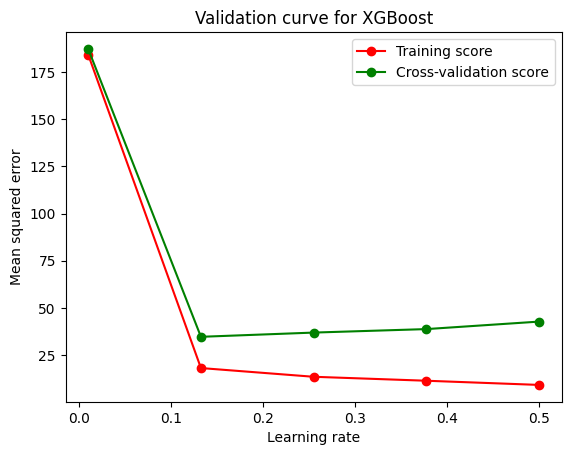

In [69]:
# Vary the learning rate from 0.01 to 0.5 with 5 evenly spaced values
learning_rates = np.linspace(0.01, 0.5, 5)

# Calculate the validation curve
train_scores, test_scores = validation_curve(
    XGBRegressor(**grid_search.best_params_, random_state=42), X_train, y_train,
    param_name='learning_rate', param_range=learning_rates, cv=5, scoring='neg_mean_squared_error'
)

# Convert the scores to mean squared error
train_scores = -train_scores
test_scores = -test_scores

# Plot the validation curve
plt.plot(learning_rates, np.mean(train_scores, axis=1), 'o-', color="r",
         label='Training score')
plt.plot(learning_rates, np.mean(test_scores, axis=1), 'o-', color="g",
         label='Cross-validation score')
plt.xlabel('Learning rate')
plt.ylabel('Mean squared error')
plt.title('Validation curve for XGBoost')
plt.legend()
plt.show()

# ➕➖ **Calculating the inference time for a single image.** ➗✖

This code measures how long it takes to make predictions on a test set using a machine learning model. 

- `start_time = time.time()`: This line starts a timer to track the start time of the prediction process.

- `y_pred = grid_search.best_estimator_.predict(X_test)`: This line makes predictions on a test set using a machine learning model that has been fine-tuned using Grid Search. The predictions are stored in the `y_pred` variable.

- `end_time = time.time()`: This line stops the timer and captures the end time of the prediction process.

- `inference_time = end_time - start_time`: This line calculates the total time taken to make the predictions by subtracting the start time from the end time.

- `print(f"Inference time: {inference_time:.9f} seconds")`: This line prints the total time taken to make the predictions in seconds, with up to nine decimal places for accuracy.

In [70]:
# Start the timer
start_time = time.time()

# Make predictions on the test set
y_pred_inft = grid_search.best_estimator_.predict(X_test)

# End the timer
end_time = time.time()

# Calculate the inference time
inference_time = end_time - start_time

# Print the inference time
print(f"Inference time: {inference_time:.9f} seconds")

Inference time: 0.003482819 seconds


# 📝 **Saving Predictions to a CSV File**

🤖 **Objective:** This code saves the model's predictions to a CSV file.

📋 **Step-by-Step:**

1. The first line of code gets a list of subject IDs for the test set.

2. Next, a DataFrame is created with the subject IDs and predicted ages.

3. Finally, the `to_csv()` function is used to save the DataFrame to a CSV file named "submission.csv". The `index=False` argument ensures that the index column is not included in the CSV file.

In [71]:
# Get a list of subject IDs for the test set
subject_ids = [int(name.split('_')[2]) for name in test_files]

# Create a DataFrame with the subject IDs and predicted ages
submission_df = pd.DataFrame({'Subject': subject_ids, 'Age': y_pred})

# Remove any duplicate Subject IDs
submission_df.drop_duplicates(subset='Subject', inplace=True)

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

print("Done creating!")

Done creating!


# 📝 **Reading and Printing Data from CSV**

- The `with open()` statement opens the file named `submission.csv` in read mode and creates a file object called `file`.
- `file.readlines()` reads all the lines from the file object and returns a list of strings.
- `[1:]` slices the list to exclude the first line, which usually contains the column names or headers.
- A `for` loop is used to iterate over the remaining lines in the list `data`.
- For each line, the `split()` method is used to split the line into a list of strings using `,` as the delimiter.
- The first element of the list is the file name, and the second element is the predicted age.
- The file name and predicted age are printed in a tabular format using the `print()` statement and the `f-string` formatting.

👀 **Note:**

- This code reads a CSV file and prints the data in a formatted way. 
- The data in the CSV file should be in comma-separated format, and the first line should contain column names or headers. 
- The `split()` method is used to extract the data from the CSV file, assuming that the data is formatted correctly.

In [72]:
with open('./submission.csv', 'r') as file:
    data = file.readlines()[1:]
    print(f'File Name\t|\tAge\n')
    for i in range(len(data)):
        print(f'{data[i].split(",")[0]}\t\t|\t{data[i].split(",")[1]}')

File Name	|	Age

4697		|	20

4699		|	20

4702		|	20

4706		|	20

4708		|	20

4711		|	21

4712		|	21

4716		|	21

4719		|	20

4721		|	20

4722		|	20

4723		|	23

4725		|	20

4726		|	19

4727		|	22

4728		|	21

4729		|	20

4730		|	20

4731		|	20

4733		|	20

4735		|	21

4738		|	22

4739		|	19

4740		|	20

4743		|	21

4745		|	20

4748		|	20

4749		|	22

4751		|	22

4752		|	21

4753		|	21

4761		|	21

4762		|	20

4763		|	20

4764		|	23

4765		|	19

4767		|	21

4770		|	21

4773		|	24

4774		|	21

4776		|	23

4778		|	20

4781		|	24

4782		|	21

4784		|	23

4786		|	21

4787		|	19

4788		|	22

4789		|	19

4790		|	23

4792		|	22

4802		|	21

4803		|	20

4804		|	20

4805		|	21

4807		|	21

4808		|	20

4809		|	20

4811		|	20

4818		|	21

4820		|	20

4821		|	20

4823		|	21

4824		|	21

4827		|	21

4833		|	20

4837		|	24

4838		|	20

4840		|	22

4842		|	20

4843		|	21

4844		|	21

4847		|	21

4851		|	19

4854		|	20

4856		|	21

4860		|	21

4861		|	20

4862		|	19

4865		|	22

4867		|	21

4869		|	22
